In [1]:
# Libraries
## Mathematics
import numpy as np
from scipy.stats import norm

## Visualization
import matplotlib.pyplot as plt

In [2]:
# Load functions .py files
from Perspective_comparison_functions import simulate_brownian_bridge

# Brownian bridges simulation

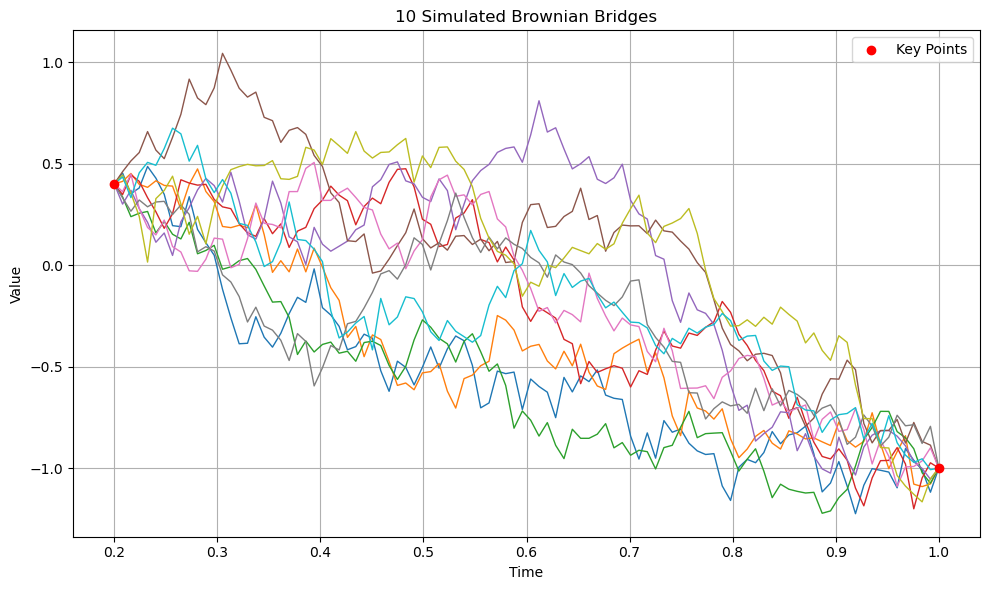

In [3]:
# Parameters
t = 0.2
z_t = 0.4
T = 1
z_T = -1.0
n_paths = 10

# Plot 10 sample bridges
plt.figure(figsize=(10, 6))
for i in range(n_paths):
    times, bridge = simulate_brownian_bridge(t = t, z_t = z_t, T=T, z_T = z_T, n_steps=100)
    plt.plot(times, bridge, lw=1)

plt.scatter([t, T], [z_t, z_T], color='red', zorder=5, label='Key Points')
plt.title('10 Simulated Brownian Bridges')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Densities comparison

10 0.3 0.4


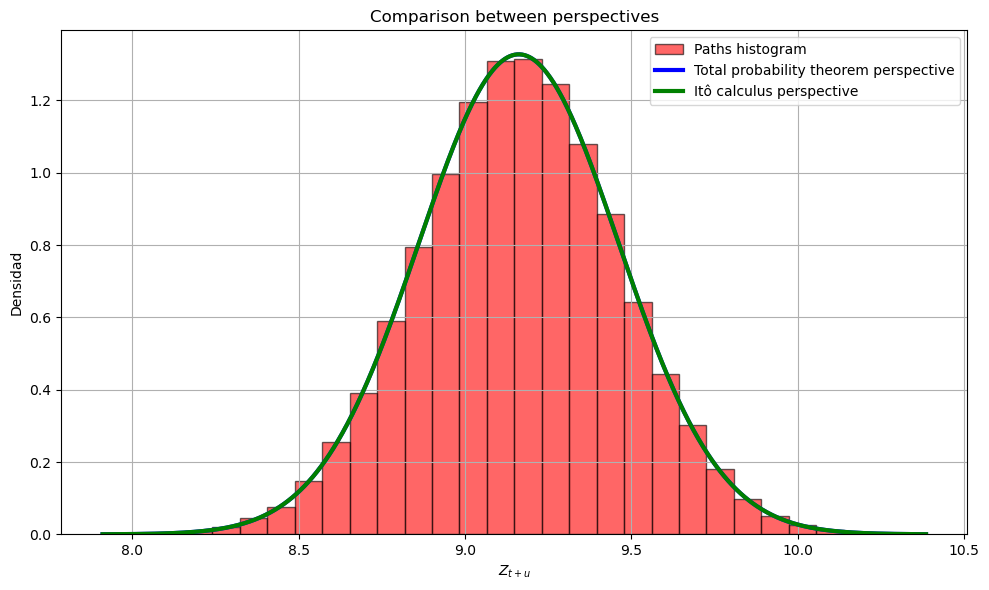

In [4]:
# Initialize parameters
Seed = 13
m = 1
gamma = 1/2
c1 = (1 - gamma**2) # Constant 1
c2 = 1 / c1  # Constant 2
c3 = m * c2  # Constant 3
np.random.seed(Seed)

y = 10
t = 0.3
dt = 100*1/1000
t_plus_u = t + dt
print(y, t, t_plus_u)
M = 100000

# Parameters for \mu_{t,z}
mtz = m
gammatz = gamma

# Simulate process
m_ty = (y*gamma**2+m*(1-t))/(t*gamma**2+1-t)
gamma_ty = np.sqrt((1-t)*gamma**2/(t*gamma**2+1-t))
Z1 = m_ty + gamma_ty * np.random.randn(M) # Generated M values of the distribution Z_1~N(m_{t, y}, gamma_{t, y}^2)
Ztu = [] # Initialize Z_{t+u}

for z1 in Z1:
  Ztu.append(simulate_brownian_bridge(t=t, z_t=y, T=1, z_T = z1, u=dt)) # Simulated the brownian brigdge to t+u

# Plot density histogram
plt.figure(figsize=(10, 6))
count, bins, ignored = plt.hist(np.array(Ztu), bins=30, density=True, alpha=0.6,
                                 color='red', edgecolor='black',
                                 label='Paths histogram')

# Overlay normal distributions
x = np.linspace(min(bins), max(bins), 1000)
plt.plot(x, norm.pdf(x, loc=y + (dt/(1-t))*(m_ty-y), scale=np.sqrt(((dt/(1-t))**2)*(gamma_ty**2) + (1-t-dt)*dt/(1-t))), 'b-', lw=3, label='Total probability theorem perspective')
plt.plot(x, norm.pdf(x, loc=(1-(dt/(c2-t)))*(y + (m*(1-t*c1))/(c1*(1-(t+dt)*c1)) - c3), scale=np.sqrt(dt - (dt**2)/(c2 - t))), 'g-', lw=3, label='Itô calculus perspective')

# Plot settings
plt.title('Comparison between perspectives')
plt.xlabel('$Z_{t+u}$')
plt.ylabel('Densidad')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()